In [1]:
import cv2
import numpy as np
import os
import pytesseract
import matplotlib.pyplot as plt

In [48]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"#Mention your tesseract path here

In [180]:
# We define a function to display 2 images, which will be used in our project
def plot_images(img1, img2, title1='', title2=''):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)#1 row, 2 cols, focuing on 1st col
    ax1.imshow(img1, cmap='gray')
    ax1.set(xticks=[], yticks=[], title=title1)
    
    ax2 = fig.add_subplot(122)#1 row, 2 cols, focuing on 2nd col
    ax2.imshow(img2, cmap='gray')
    ax2.set(xticks=[], yticks=[], title=title2)    

In [181]:
#Reading the image
path = "./Images/image1.png"
image = cv2.imread(path)

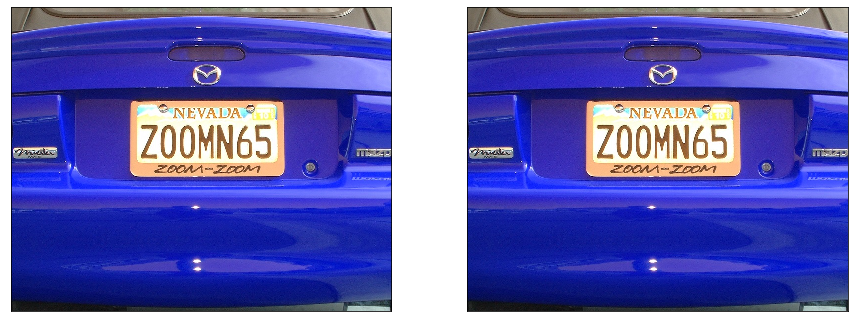

In [182]:
plot_images(image, image)

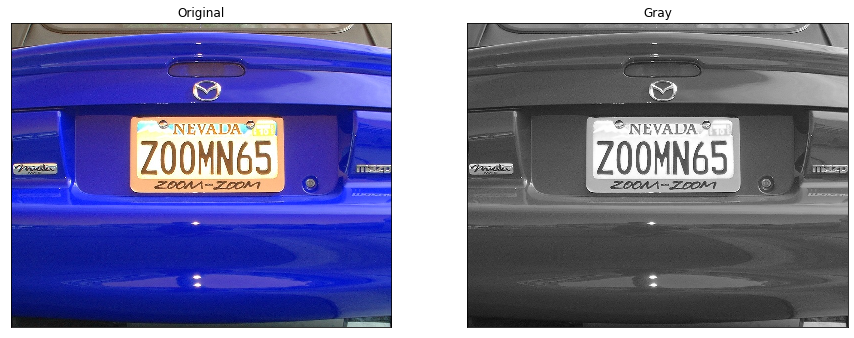

In [183]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#for faster computation of image, we convert the image to grayscale
plot_images(image, gray, title1='Original', title2='Gray')

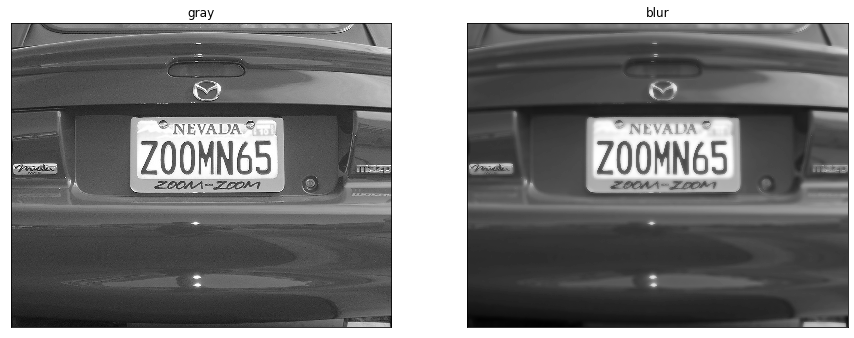

In [184]:
blur = cv2.bilateralFilter(gray, 11, 90, 90)#to remove the noise in image
plot_images(gray, blur, title1='gray', title2='blur')

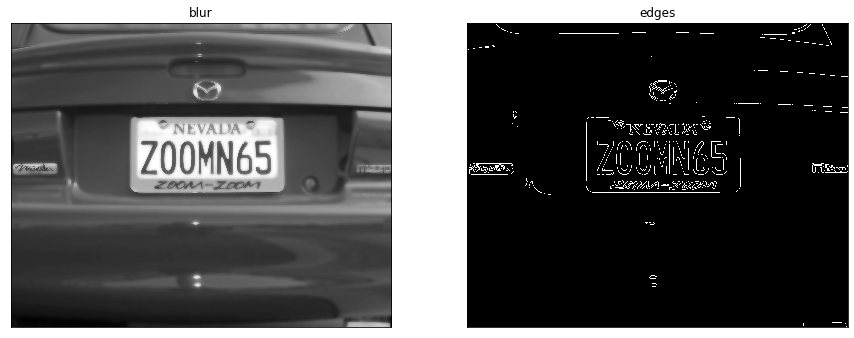

In [185]:
edges = cv2.Canny(blur, 30, 200)#applying edge detection
plot_images(blur, edges, title1='blur', title2='edges')

In [186]:
contours, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#we are using a copy of the image because findContours changes the image too much because it tries to find all the co-ordinates of any possible figure/curves joining to make a figure

In [187]:
# contours is a list, which contains all the list of x,y coordinates forming a possible ROI
print(len(contours))
#contours[0]#gives us the 1st list of the main list contours

111


In [188]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
# '-1' specifies that we want to draw all contours in the contours list

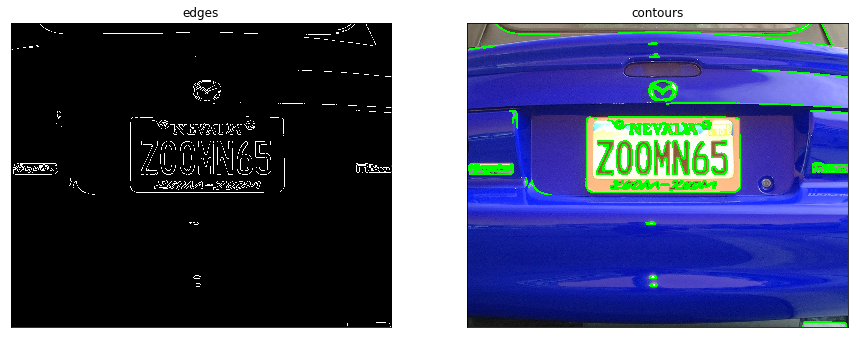

In [189]:
plot_images(edges, image_copy, title1='edges', title2='contours')

In [190]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]#sorting the contours to get the biggest contour first

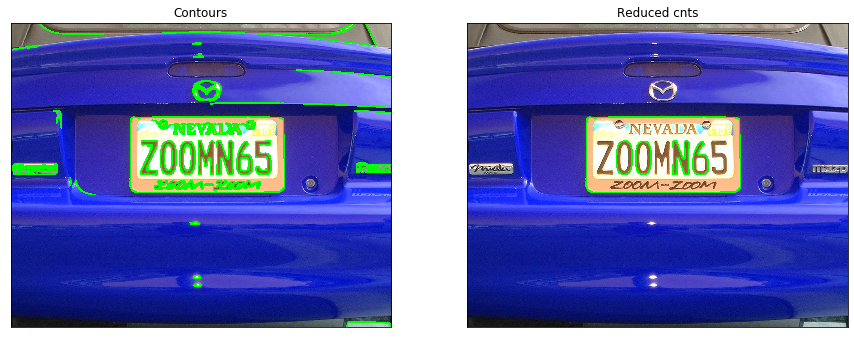

In [191]:
image_copy2 = image.copy()
_ = cv2.drawContours(image_copy2, contours, -1, (0, 255, 0), 2)
plot_images(image_copy, image_copy2, title1='Contours', title2='Reduced cnts')

In [192]:
plate = None
for c in contours:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)#approxPolyDP draws a possible Rectangle
    #0.02 is the epsilon value/precision, we can experiment on this
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break
cv2.imwrite("Output.png", plate)

True

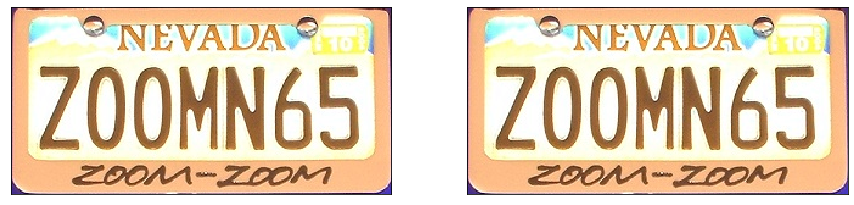

In [193]:
plot_images(plate, plate)

In [194]:
#text = pytesseract.image_to_string(plate, lang="eng")
text = pytesseract.image_to_string(plate, lang="eng", config ='--psm 11 --oem 1')
print(text)

ZOOMN65

ZOOMN~ZCLOK1


#### Page segmentation modes(These values can be used in config parameter to experiment with various results):
  0    Orientation and script detection (OSD) only.
  
  1    Automatic page segmentation with OSD.
  
  2    Automatic page segmentation, but no OSD, or OCR.
  
  3    Fully automatic page segmentation, but no OSD. (Default)
  
  4    Assume a single column of text of variable sizes.
  
  5    Assume a single uniform block of vertically aligned text.
  
  6    Assume a single uniform block of text.
  
  7    Treat the image as a single text line.
  
  8    Treat the image as a single word.
  
  9    Treat the image as a single word in a circle.
 
 10    Treat the image as a single character.
 
 11    Sparse text. Find as much text as possible in no particular order.
 
 12    Sparse text with OSD.
 
 13    Raw line. Treat the image as a single text line,
                        bypassing hacks that are Tesseract-specific.